# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


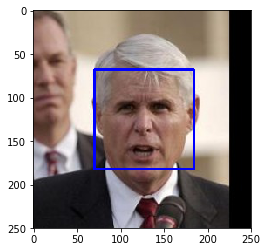

In [17]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [18]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [19]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
def get_detector_percent(data, fn):
    cnt = 0
    for img in data:
        test = fn(img)
        if test:
            cnt +=1
    return (cnt/(len(data)))*(len(data))         

print('Answer 1')
print('a. Percentage of detected human face in human files: {}%'.format(get_detector_percent(human_files_short, face_detector)))
print('b. Percentage of detected human face in dog files: {}%'.format(get_detector_percent(dog_files_short,face_detector)))



Answer 1
a. Percentage of detected human face in human files: 100.0%
b. Percentage of detected human face in dog files: 8.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [28]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [20]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:31<00:00, 17324701.04it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [15]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img = Image.open(img_path)
    
    convertToTensor = transforms.Compose([transforms.RandomResizedCrop(250),
                                             transforms.ToTensor()])
    
    imgTensor = convertToTensor(img)
    imgTensor = imgTensor.unsqueeze(0) 
    
    if torch.cuda.is_available():
        imgTensor = imgTensor.cuda()

    predictedClassIndex = VGG16(imgTensor)
    
    # move tensor to cpu, for cpu processing
    if torch.cuda.is_available():
        predictedClassIndex = predictedClassIndex.cpu()
   
    return predictedClassIndex.data.numpy().argmax() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [13]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    index = VGG16_predict(img_path)
    return (151 <= index and index <= 268) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [40]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
print('Answer 2')
print('a. Percentage of detected dog in human files: {}%'.format(get_detector_percent(human_files_short, dog_detector)))
print('b. Percentage of detected dog in dog files: {}%'.format(get_detector_percent(dog_files_short,dog_detector)))

Answer 2
a. Percentage of detected dog in human files: 1.0%
b. Percentage of detected dog in dog files: 77.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [41]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
from PIL import Image
import torchvision.transforms as transforms

from torchvision import models
import torch
 
from torchvision import transforms
transform = transforms.Compose([            
 transforms.Resize(256),                    
 transforms.CenterCrop(224),                
 transforms.ToTensor(),                     
 transforms.Normalize(                      
 mean=[0.485, 0.456, 0.406],                
 std=[0.229, 0.224, 0.225]                  
 )])

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def alexnet_predict(img_path):
    alexnet = models.alexnet(pretrained=True)
    img = Image.open(img_path)
    
    imgTensor = transform(img)
    batch_t = torch.unsqueeze(imgTensor, 0)
    alexnet.eval()
    out = alexnet(batch_t)
    _, index = torch.max(out, 1)
 
    return index

def resnet101_predict(img_path):
    resnet = models.resnet101(pretrained=True)
    img = Image.open(img_path)
    
    imgTensor = transform(img)
    batch_t = torch.unsqueeze(imgTensor, 0)
    resnet.eval()
    out = resnet(batch_t)
    _, index = torch.max(out, 1)
 
    return index

def dog_detector_alexnet(img_path):
    index = alexnet_predict(img_path)
    #percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    #print(labels[index[0]], percentage[index[0]].item())
    
    return (151 <= index and index <= 268) # true/false

def dog_detector_resnet101(img_path):
    index = resnet101_predict(img_path)
    return (151 <= index and index <= 268) # true/false

print('alexnet')
print('a. Percentage of detected dog in human files: {}%'.format(get_detector_percent(human_files_short, dog_detector_alexnet)))
print('b. Percentage of detected dog in dog files: {}%'.format(get_detector_percent(dog_files_short,dog_detector_alexnet)))


print('resnet101')
print('a. Percentage of detected dog in human files: {}%'.format(get_detector_percent(human_files_short, dog_detector_resnet101)))
print('b. Percentage of detected dog in dog files: {}%'.format(get_detector_percent(dog_files_short,dog_detector_resnet101)))

alexnet


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.torch/models/alexnet-owt-4df8aa71.pth
100%|██████████| 244418560/244418560 [00:06<00:00, 39028376.58it/s]


a. Percentage of detected dog in human files: 1.0%
b. Percentage of detected dog in dog files: 99.0%
resnet101


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.torch/models/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:02<00:00, 86546475.95it/s]


a. Percentage of detected dog in human files: 1.0%
b. Percentage of detected dog in dog files: 99.0%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [1]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
import torch
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

num_workers = 0
batch_size = 32

transformTrainPipeline = transforms.Compose([transforms.Resize(256),
                                             transforms.RandomResizedCrop(224), 
                                             transforms.RandomHorizontalFlip(),
                                             transforms.RandomAffine(degrees=5, translate=(0.1, 0.1), scale=(1.0, 1.1), shear=5, resample=False, fillcolor=0),
                                             transforms.RandomApply([transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1)], p=0.5),
                                             transforms.RandomGrayscale(p=0.2),
                                             transforms.ToTensor(),
                                             transforms.Normalize([0.485, 0.456, 0.406],
                                                                  [0.229, 0.224, 0.225])])

transformValidatePipeline = transforms.Compose([transforms.Resize(256),
                                                transforms.CenterCrop(224), 
                                                transforms.ToTensor(),
                                                transforms.Normalize([0.485, 0.456, 0.406],
                                                                     [0.229, 0.224, 0.225])])
transformTestPipeline = transforms.Compose([transforms.Resize(256),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406],
                                                                  [0.229, 0.224, 0.225])])

trainData = datasets.ImageFolder('/data/dog_images/train', transform=transformTrainPipeline)
validateData = datasets.ImageFolder('/data/dog_images/valid', transform=transformValidatePipeline)
testData = datasets.ImageFolder('/data/dog_images/test', transform=transformTestPipeline)

trainLoader = torch.utils.data.DataLoader(trainData, batch_size=batch_size, num_workers=num_workers,shuffle=True)
validLoader = torch.utils.data.DataLoader(validateData, batch_size=batch_size, num_workers=num_workers,shuffle=True)
testLoader = torch.utils.data.DataLoader(testData, batch_size=batch_size, num_workers=num_workers,shuffle=True)

loaders_scratch = {
    'train' : trainLoader,
    'valid' : validLoader,
    'test' : testLoader
}

dataset_sizes = {
    'train' : len(trainData),
    'valid' : len(validateData),
    'test' : len(testData)
}


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 
1. a. Created three transformation pipelines for training, validating and testing. 
   b. The image is resized to 256 and randomly cropped to 224. 
   c. Since a byte is defined as 8-bits and can represent values from 0 to 255, 256 different values, I choose to resize images to 256. 
   d. The input tensor value [224 x 224 x 3] was choosen by trial and error. 
      As per my network design I added three convolutional layers and two hidden layers. The convolutional layer was stretched to a value of 128 in the depth dimension and the image height and width was reduced to [28 x 28]. 
2. Yes, data was augmented to introduce randomness in the training pipeline by resizing the image, croping the image, randomly appling the color jitter by changing the brightness, contrast and saturation of the image with a probability of 0.5 and converting to grayscale

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [2]:
import torch.nn as nn
import torch.nn.functional as F
import torch
use_cuda = torch.cuda.is_available()
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.norm2d1 = nn.BatchNorm2d(128)

        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 133)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = self.pool(F.relu(self.norm2d1(self.conv3(x))))

        x = x.view(-1, 128 * 28 * 28)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x
#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [3]:
print(model_scratch)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (norm2d1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

In order to reach to the final CNN architecture following steps were taken
1. Three separate transformation pipelines were created for training, validation and testing

2. Experimentation was done to augment the images by resizing, cropping, flipping, rotating and modifying the image brightness, contrast, grayscale and saturation.

3. Started with three convolution layers and 1 fully connected layer, but validation loss increased to more than 5.0 after few epochs

4. Experimented with following architecture

   a. Experiment 1
   
       conv1: Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
       conv2: Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
       conv3: Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
       
      Result:  Validation loss increased to more than 5.0 after few epochs
      
   b. Experiment 2
   
       Used the setup in Experiment 1 and Added BatchNorm2d on conv1
       
       Result:  Validation loss increased to more than 5.0 after few epochs
      
   c. Experiment 3
   
       conv1: Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
       conv2: Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
       conv3: Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
       
       Added BatchNorm2d on conv1
       
       Result: There was slight improvement. Validation loss increased to more than 5.0 after 15 epochs with accuracy of <1%
       
    c. Experiment 4
    
       conv1: Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
       conv2: Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
       conv3: Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
       
       Included Dropout
       
            x = x.view(-1, 128 * 28 * 28)
            x = self.dropout(x)
            x = F.relu(self.fc1(x))
            x = self.dropout(x)
            x = self.fc2(x)
            
       Result: Not much improvement. Validation loss increased to more than 5.0 after 15 epochs with accuracy of <1%
       
     d. Experiment 5
     
       conv1: Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
       conv2: Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
       conv3: Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
       
       Included Dropout between conv layers and also added batch normalization on output of 3rd convolution layer with 
       Experiment 4 as baseline. 
       
            x = self.pool(F.relu(self.conv1(x)))
            x = self.dropout(x)
            x = self.pool(F.relu(self.conv2(x)))
            x = self.dropout(x)
            x = self.pool(F.relu(self.norm2d1(self.conv3(x))))
            
       Result: By adding dropouts observed the validation loss going down with more epoch count. Updated the epoch count from 20 to 30 to 50 to 80 and 100. By increasing epoch counts, it was observed that the validation loss was decreasing. 
       
       
       Final Result : The CNN requires more improvement. It was able to achieve more than 10% accuracy.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [4]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [5]:
import numpy as np
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1/ (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), 'model_scratch.pt')
            valid_loss_min = valid_loss    
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.896254 	Validation Loss: 4.836055
Validation loss decreased (inf --> 4.836055).  Saving model ...
Epoch: 2 	Training Loss: 4.795158 	Validation Loss: 4.770553
Validation loss decreased (4.836055 --> 4.770553).  Saving model ...
Epoch: 3 	Training Loss: 4.756945 	Validation Loss: 4.714530
Validation loss decreased (4.770553 --> 4.714530).  Saving model ...
Epoch: 4 	Training Loss: 4.714536 	Validation Loss: 4.707693
Validation loss decreased (4.714530 --> 4.707693).  Saving model ...
Epoch: 5 	Training Loss: 4.696963 	Validation Loss: 4.707516
Validation loss decreased (4.707693 --> 4.707516).  Saving model ...
Epoch: 6 	Training Loss: 4.688486 	Validation Loss: 4.662408
Validation loss decreased (4.707516 --> 4.662408).  Saving model ...
Epoch: 7 	Training Loss: 4.649746 	Validation Loss: 4.627130
Validation loss decreased (4.662408 --> 4.627130).  Saving model ...
Epoch: 8 	Training Loss: 4.653888 	Validation Loss: 4.598823
Validation loss decreased (4.62713

##### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [6]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.606069


Test Accuracy: 12% (107/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [3]:
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

import torchvision.transforms as transforms
import torch

num_workers = 4
batch_size = 4
transformTrainPipeline = transforms.Compose([transforms.Resize(256),
                                             transforms.RandomResizedCrop(224), 
                                             transforms.RandomHorizontalFlip(),
                                             transforms.RandomAffine(degrees=5, translate=(0.1, 0.1), scale=(1.0, 1.1), shear=5, resample=False, fillcolor=0),
                                             transforms.RandomApply([transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1)], p=0.5),
                                             transforms.RandomGrayscale(p=0.2),
                                             transforms.ToTensor(),
                                             transforms.Normalize([0.485, 0.456, 0.406],
                                                                  [0.229, 0.224, 0.225])])

transformValidatePipeline = transforms.Compose([transforms.Resize(256),
                                                transforms.CenterCrop(224), 
                                                transforms.ToTensor(),
                                                transforms.Normalize([0.485, 0.456, 0.406],
                                                                     [0.229, 0.224, 0.225])])
transformTestPipeline = transforms.Compose([transforms.Resize(256),
                                            transforms.CenterCrop(224),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406],
                                                                  [0.229, 0.224, 0.225])])

trainData = datasets.ImageFolder('/data/dog_images/train', transform=transformTrainPipeline)
validateData = datasets.ImageFolder('/data/dog_images/valid', transform=transformValidatePipeline)
testData = datasets.ImageFolder('/data/dog_images/test', transform=transformTestPipeline)

trainLoader = torch.utils.data.DataLoader(trainData, batch_size=batch_size, num_workers=num_workers,shuffle=True)
validLoader = torch.utils.data.DataLoader(validateData, batch_size=batch_size, num_workers=num_workers,shuffle=True)
testLoader = torch.utils.data.DataLoader(testData, batch_size=batch_size, num_workers=num_workers,shuffle=True)

loaders_scratch = {
    'train' : trainLoader,
    'valid' : validLoader,
    'test' : testLoader
}

dataset_sizes = {
    'train' : len(trainData),
    'valid' : len(validateData),
    'test' : len(testData)
}


In [4]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [5]:
model_transfer = models.resnet50(pretrained=True)
num_ftrs = model_transfer.fc.in_features
class_names = trainData.classes
model_transfer.fc = nn.Linear(num_ftrs, len(class_names))

use_cuda = torch.cuda.is_available()

device = torch.device("cuda:0" if use_cuda else "cpu")

model_transfer = model_transfer.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 64695876.65it/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

Resnet 50 was choosen since it is trained on more than million images from ImageNet database. Its network is 50 layers deep and classify images to 1000 object categories. It has learned features from wide range of images. 

Steps to get to final CNN architecture
1. Created transformation pipelines for training, validation and testing.
2. Introduced randomness by resizing, cropping, flipping, rotating and modifying the image brightness, contrast, grayscale and saturation. 
3. A fully connected layer was added with output of 133 which defines 133 classes of dogs
4. Experimented with batch size and epoch counts. To improve the accuracy of the network, epoch count may need to be increase.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [6]:
# Loss function
criterion_transfer = nn.CrossEntropyLoss()

# Optimization + learning rate. Note that all parameters are being optimized.
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.001, momentum=0.9)

# Regularization. Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_transfer, step_size=7, gamma=0.1)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [22]:
import copy
import time
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    device = torch.device("cuda:0" if use_cuda else "cpu")
    
    for epoch in range(n_epochs):
        print('Epoch {}/{}'.format(epoch+1, n_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                exp_lr_scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in loaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} | Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
                torch.save(model.state_dict(), save_path)
                print("Checkpoint saved")                

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    
    return model
# train the model
model_transfer = train(25, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch 1/25
----------
train Loss: 2.6116 | Acc: 0.3455
valid Loss: 1.4615 | Acc: 0.5928
Checkpoint saved

Epoch 2/25
----------
train Loss: 2.4307 | Acc: 0.3814
valid Loss: 1.5049 | Acc: 0.6299
Checkpoint saved

Epoch 3/25
----------
train Loss: 2.2264 | Acc: 0.4195
valid Loss: 1.2752 | Acc: 0.6563
Checkpoint saved

Epoch 4/25
----------
train Loss: 2.1267 | Acc: 0.4507
valid Loss: 1.3626 | Acc: 0.6587
Checkpoint saved

Epoch 5/25
----------
train Loss: 2.0122 | Acc: 0.4720
valid Loss: 1.0788 | Acc: 0.7066
Checkpoint saved

Epoch 6/25
----------
train Loss: 1.9813 | Acc: 0.4856
valid Loss: 1.0016 | Acc: 0.7473
Checkpoint saved

Epoch 7/25
----------
train Loss: 1.4860 | Acc: 0.6123
valid Loss: 0.5323 | Acc: 0.8323
Checkpoint saved

Epoch 8/25
----------
train Loss: 1.3407 | Acc: 0.6567
valid Loss: 0.5185 | Acc: 0.8419
Checkpoint saved

Epoch 9/25
----------
train Loss: 1.3207 | Acc: 0.6585
valid Loss: 0.4933 | Acc: 0.8359

Epoch 10/25
----------
train Loss: 1.2570 | Acc: 0.6798
valid L

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [23]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)


Test Loss: 0.486631


Test Accuracy: 84% (709/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [24]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
import cv2
from PIL import Image
#data_transfer = datasets.ImageFolder('/data/dog_images/train')

# list of class names by index, i.e. a name can be accessed like class_names[0]
#class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    global model_transfer
    global transform_pipeline
    # load the image and return the predicted breed

    image = Image.open(img_path).convert('RGB')
#    transform_pipeline = transforms.Compose([transforms.Resize(size=(224, 224)),
#                                     transforms.ToTensor()])

    # Removing transparent, alpha
    transform_pipeline = transforms.Compose([transforms.RandomResizedCrop(224),
                                             transforms.ToTensor()])
    image = transform_pipeline(image)[:3,:,:].unsqueeze(0)
    
    if use_cuda:
        model_transfer = model_transfer.cuda()
        image = image.cuda()
    
    model_transfer.eval()
    idx = torch.argmax(model_transfer(image))
    return class_names[idx]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [27]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
from matplotlib import pyplot as plt
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    breed = predict_breed_transfer(img_path) 
    
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(img_path, fontsize=16)
    plt.imshow(cv_rgb)
    plt.show()
    
    if dog_detector(img_path):
        print("Dog breed is: " + str(breed))
    elif face_detector(img_path):
        print("Human resembing dog breed " + str(breed))
    else:
        print("Error - Neither dog nor human detected!")
        

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The output looks neither better nor worse than expected

Following are some of the improvements
1. Increasing the epoch count may provide more accurate model where the training loss and validation loss are a minimum
2. Adding few more convolution layers and/or fully connected layers may help improve accuracy
3. Adding more images per class of dogs may help improve the models's accuracy

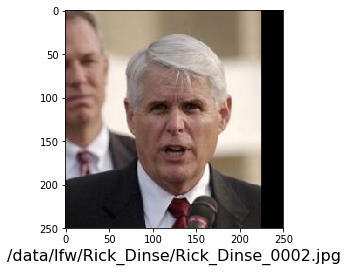

Human resembing dog breed 048.Chihuahua


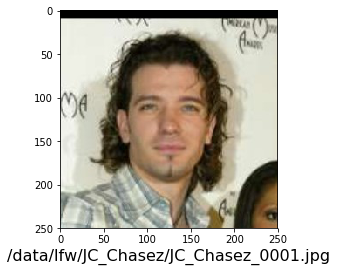

Human resembing dog breed 101.Maltese


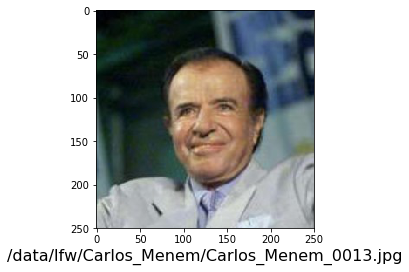

Human resembing dog breed 040.Bulldog


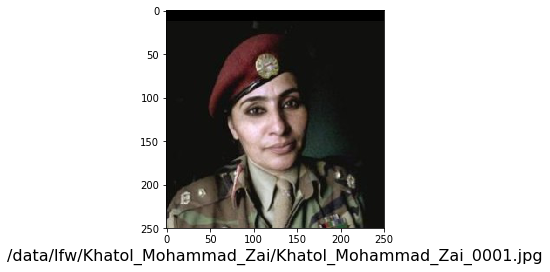

Human resembing dog breed 082.Havanese


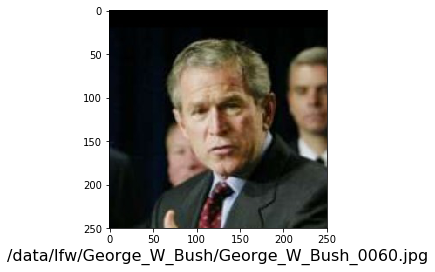

Dog breed is: 040.Bulldog


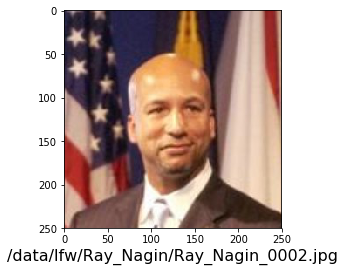

Human resembing dog breed 081.Greyhound


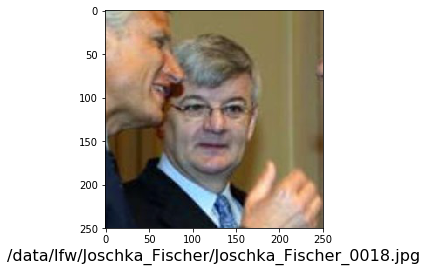

Human resembing dog breed 079.Great_pyrenees


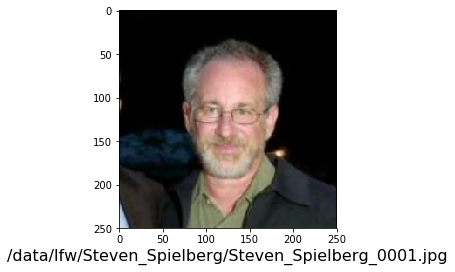

Human resembing dog breed 040.Bulldog


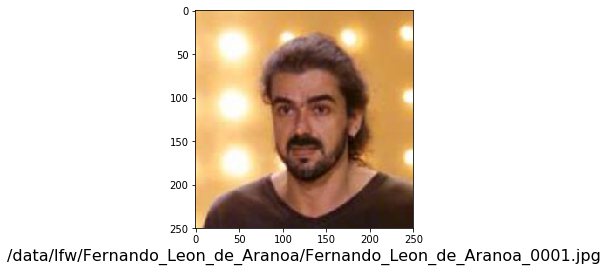

Human resembing dog breed 048.Chihuahua


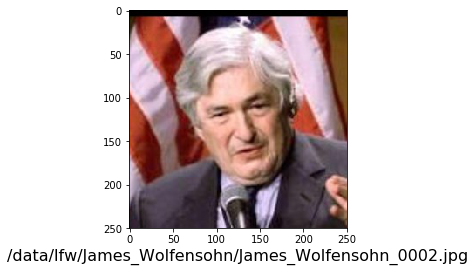

Human resembing dog breed 101.Maltese


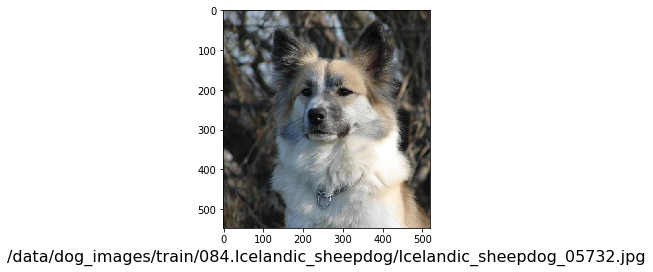

Dog breed is: 006.American_eskimo_dog


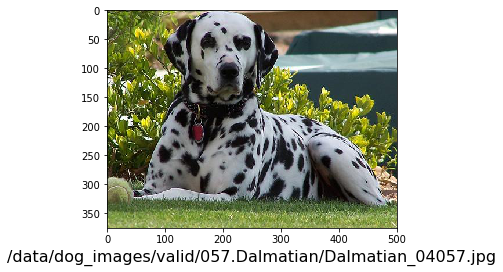

Dog breed is: 057.Dalmatian


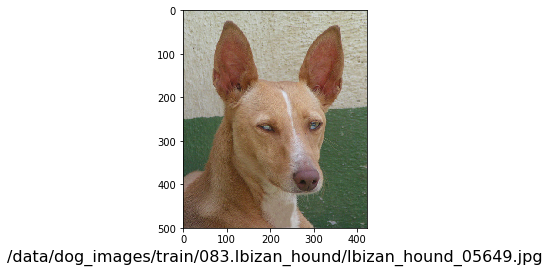

Dog breed is: 083.Ibizan_hound


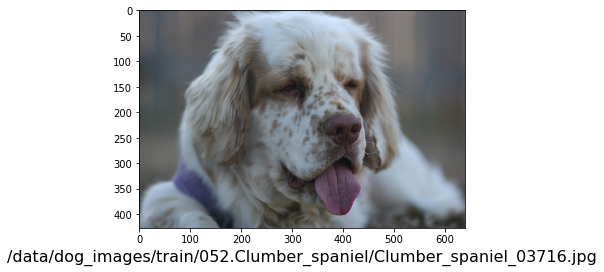

Error - Neither dog nor human detected!


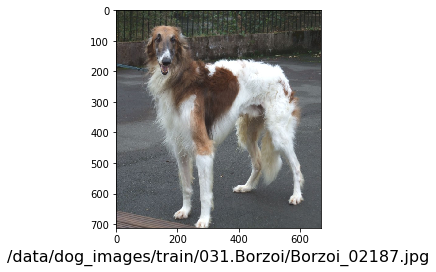

Dog breed is: 031.Borzoi


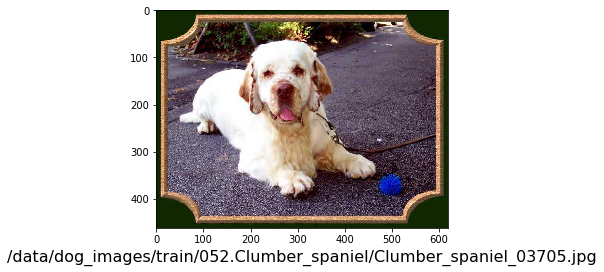

Dog breed is: 052.Clumber_spaniel


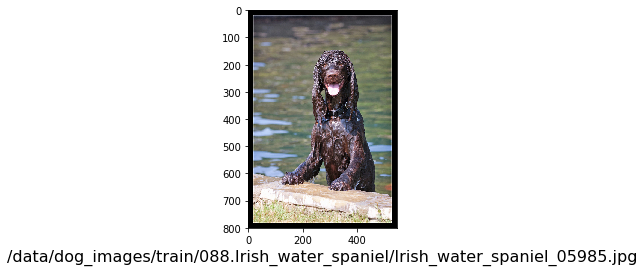

Dog breed is: 088.Irish_water_spaniel


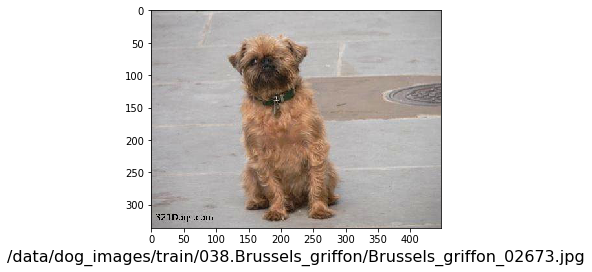

Dog breed is: 097.Lakeland_terrier


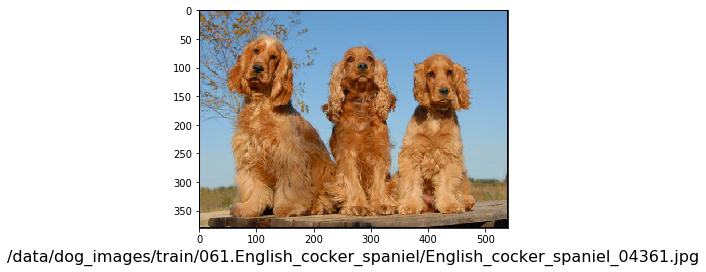

Dog breed is: 124.Poodle


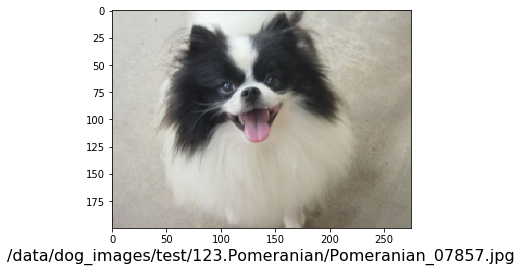

Dog breed is: 091.Japanese_chin


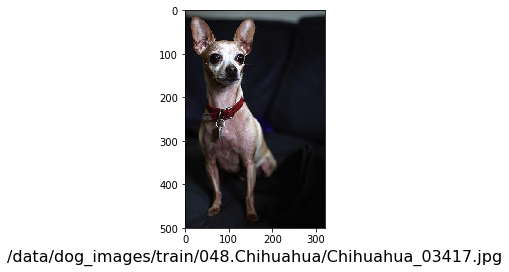

Error - Neither dog nor human detected!


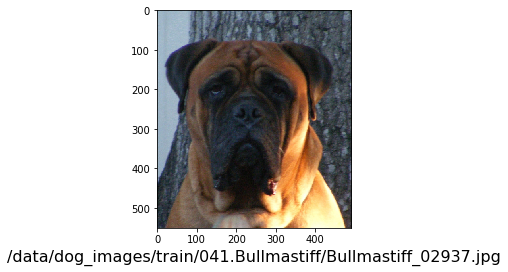

Dog breed is: 103.Mastiff


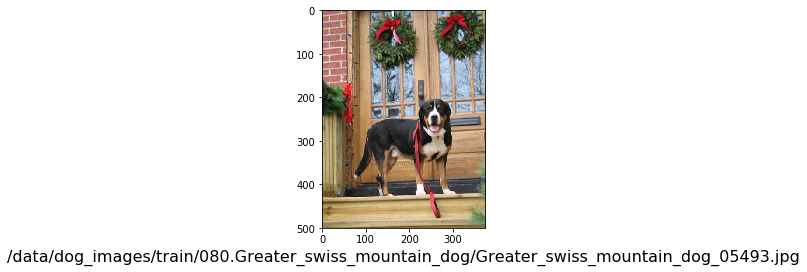

Dog breed is: 080.Greater_swiss_mountain_dog


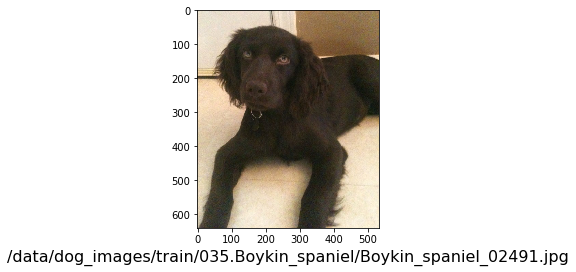

Dog breed is: 035.Boykin_spaniel


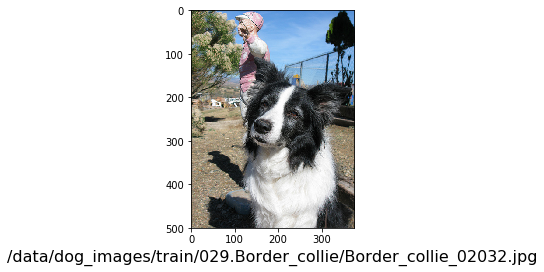

Dog breed is: 112.Nova_scotia_duck_tolling_retriever


In [31]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
import random
import numpy as np
from glob import glob
random.seed(8675309)

human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

random.shuffle(human_files)
#human_files_short = human_files[:100]

random.shuffle(dog_files)
#dog_files_short = dog_files[:100]

for file in np.hstack((human_files[:10],dog_files[:15])):
    run_app(file)